In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'../../data/html/',
         'download.prompt_for_download' : False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../../driver/chromedriver-linux64/chromedriver"),
                          options=options)


In [2]:
driver.get(url)

In [3]:
from selenium.webdriver.common.by import By

sido_name = driver.find_element(By.ID, "SIDO_NM0")
si_list = sido_name.find_elements(By.TAG_NAME , "option")
sido_list = []
for idx, si_name in enumerate(si_list):
    print(idx)
    print(si_name.get_attribute("value"))
    sido_list.append(si_name.get_attribute("value"))
    

0

1
서울특별시
2
부산광역시
3
대구광역시
4
인천광역시
5
광주광역시
6
대전광역시
7
울산광역시
8
세종특별자치시
9
경기도
10
충청북도
11
충청남도
12
전라북도
13
전라남도
14
경상북도
15
경상남도
16
제주특별자치도
17
강원특별자치도


In [4]:
sido_list = sido_list[1:]
sido_list

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도',
 '강원특별자치도']

In [5]:
sido_name.send_keys(sido_list[0])

In [6]:
sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
sigungu_list = sigungu.find_elements(By.TAG_NAME, "option")
sigungu_nm_list = []
for idx, sigungu_name in enumerate(sigungu_list):
    print(idx)
    print(sigungu_name.get_attribute("value"))
    sigungu_nm_list.append(sigungu_name.get_attribute("value"))


0

1
강남구
2
강동구
3
강북구
4
강서구
5
관악구
6
광진구
7
구로구
8
금천구
9
노원구
10
도봉구
11
동대문구
12
동작구
13
마포구
14
서대문구
15
서초구
16
성동구
17
성북구
18
송파구
19
양천구
20
영등포구
21
용산구
22
은평구
23
종로구
24
중구
25
중랑구


In [46]:
sigungu_nm_list = sigungu_nm_list[1:]

In [48]:
len(sigungu_nm_list)

25

In [49]:
import time
from tqdm.notebook import tqdm

for sigungu_name in tqdm(sigungu_nm_list[:3]):
    sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu.send_keys(sigungu_name)
    time.sleep(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [50]:
import time
from tqdm.notebook import tqdm

for sigungu_name in tqdm(sigungu_nm_list[:3]):
    sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu.send_keys(sigungu_name)
    driver.implicitly_wait(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [51]:
excel_link = driver.find_element(By.XPATH, '''//*[@id="glopopd_excel"]''')
excel_link.click()

In [52]:
import time
from tqdm.notebook import tqdm

for sigungu_name in tqdm(sigungu_nm_list):
    sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu.send_keys(sigungu_name)
    driver.implicitly_wait(3)

    excel_link = driver.find_element(By.XPATH, '''//*[@id="glopopd_excel"]''')
    excel_link.click()
    driver.implicitly_wait(3)

  0%|          | 0/25 [00:00<?, ?it/s]

In [55]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm.notebook import tqdm
from glob import glob

for sigungu_name in tqdm(sigungu_nm_list):
    sigungu = driver.find_element(By.ID, "SIGUNGU_NM0")
    sigungu.send_keys(sigungu_name)
    
    save = WebDriverWait(driver, timeout=30).until(EC.element_to_be_clickable((By.XPATH, '''//*[@id="glopopd_excel"]''')))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)
    
    time.sleep(1)




  0%|          | 0/25 [00:00<?, ?it/s]

25

In [56]:
len(glob("../../data/html/지역_*"))

25

In [57]:
driver.close()

## 데이터 정리

In [58]:
import pandas as pd

data = pd.read_excel("../../data/html/지역_위치별(주유소).xls", header=2)
data

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1719,1599,-
1,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1737,1629,-
2,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1917,1739,1600,-
3,서울특별시,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,-,1749,1626,-
4,서울특별시,극동유화㈜ 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,02-564-0186,Y,1965,1765,1674,-
5,서울특별시,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,02-529-5101,Y,1952,1769,1659,-
6,서울특별시,대교셀프주유소,서울 강남구 강남대로 640 (신사동),SK에너지,02-512-5521,Y,2020,1780,1740,-
7,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1972,1780,1674,-
8,서울특별시,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,02-3462-5215,N,1967,1784,1674,1570
9,서울특별시,SK서광주유소,서울 강남구 역삼로 142,SK에너지,02-562-4855,Y,1950,1795,1695,-


In [64]:
data_list = []

for idx in range(25):
    data = pd.read_excel(f"../../data/html/지역_위치별(주유소) ({idx}).xls", header=2)
    data_list.append(data)
oil_data = pd.concat(data_list)
pd.DataFrame(oil_data)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1719,1599,-
1,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1737,1629,-
2,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1917,1739,1600,-
3,서울특별시,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,-,1749,1626,-
4,서울특별시,극동유화㈜ 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,02-564-0186,Y,1965,1765,1674,-
...,...,...,...,...,...,...,...,...,...,...
8,서울특별시,신내주유소,서울 중랑구 용마산로 705 (신내동),SK에너지,02-2207-0523,Y,-,1759,1613,1600
9,서울특별시,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),S-OIL,02-2207-9419,N,-,1759,1619,1600
10,서울특별시,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),SK에너지,02-436-3651,Y,-,1789,1658,1650
11,서울특별시,용마로주유소,서울 중랑구 용마산로 309 (면목동),SK에너지,02-439-3037,Y,-,1798,1638,1600


In [65]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 12
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      440 non-null    object
 1   상호      440 non-null    object
 2   주소      440 non-null    object
 3   상표      440 non-null    object
 4   전화번호    440 non-null    object
 5   셀프여부    440 non-null    object
 6   고급휘발유   440 non-null    object
 7   휘발유     440 non-null    int64 
 8   경유      440 non-null    int64 
 9   실내등유    440 non-null    object
dtypes: int64(2), object(8)
memory usage: 37.8+ KB


In [66]:
oil_data = pd.DataFrame({
    "상호" : oil_data["상호"],
    "주소" : oil_data["주소"], 
    "가격" : oil_data["경유"],
    "셀프" : oil_data["셀프여부"],
    "상표" : oil_data["상표"]
})

len(oil_data)

440

In [67]:
oil_data.reset_index(drop=True, inplace=True)
oil_data

,상호,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1599,Y,SK에너지
1,방죽주유소,서울 강남구 밤고개로 215 (율현동),1629,Y,GS칼텍스
2,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1600,Y,HD현대오일뱅크
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1626,Y,SK에너지
4,극동유화㈜ 개나리주유소,서울 강남구 언주로 423 (역삼동),1674,Y,S-OIL
...,...,...,...,...,...
435,신내주유소,서울 중랑구 용마산로 705 (신내동),1613,Y,SK에너지
436,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1619,N,S-OIL
437,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1658,Y,SK에너지
438,용마로주유소,서울 중랑구 용마산로 309 (면목동),1638,Y,SK에너지


In [68]:
oil_data["구"] = [address.split()[1] for address in oil_data["주소"]]
oil_data

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1599,Y,SK에너지,강남구
1,방죽주유소,서울 강남구 밤고개로 215 (율현동),1629,Y,GS칼텍스,강남구
2,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,1600,Y,HD현대오일뱅크,강남구
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1626,Y,SK에너지,강남구
4,극동유화㈜ 개나리주유소,서울 강남구 언주로 423 (역삼동),1674,Y,S-OIL,강남구
...,...,...,...,...,...,...
435,신내주유소,서울 중랑구 용마산로 705 (신내동),1613,Y,SK에너지,중랑구
436,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1619,N,S-OIL,중랑구
437,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1658,Y,SK에너지,중랑구
438,용마로주유소,서울 중랑구 용마산로 309 (면목동),1638,Y,SK에너지,중랑구


In [70]:
len(oil_data["구"].unique())

25

In [71]:
oil_data["가격"] = oil_data["가격"].astype(float)

In [72]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      440 non-null    object 
 1   주소      440 non-null    object 
 2   가격      440 non-null    float64
 3   셀프      440 non-null    object 
 4   상표      440 non-null    object 
 5   구       440 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


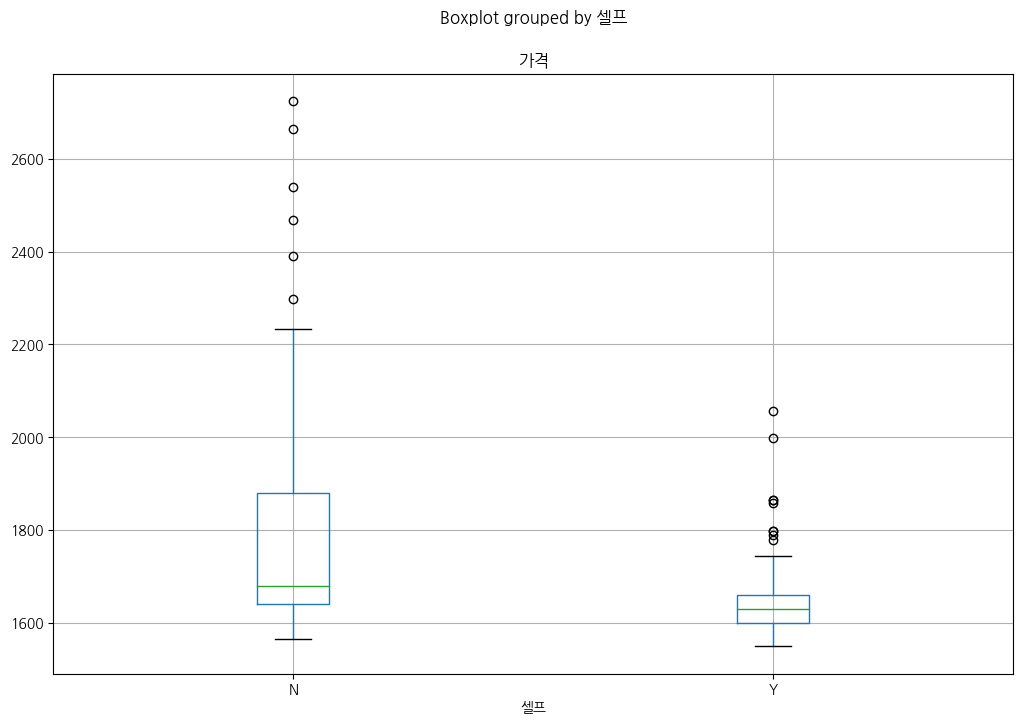

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

oil_data.boxplot(column="가격", by="셀프", figsize=(12,8));

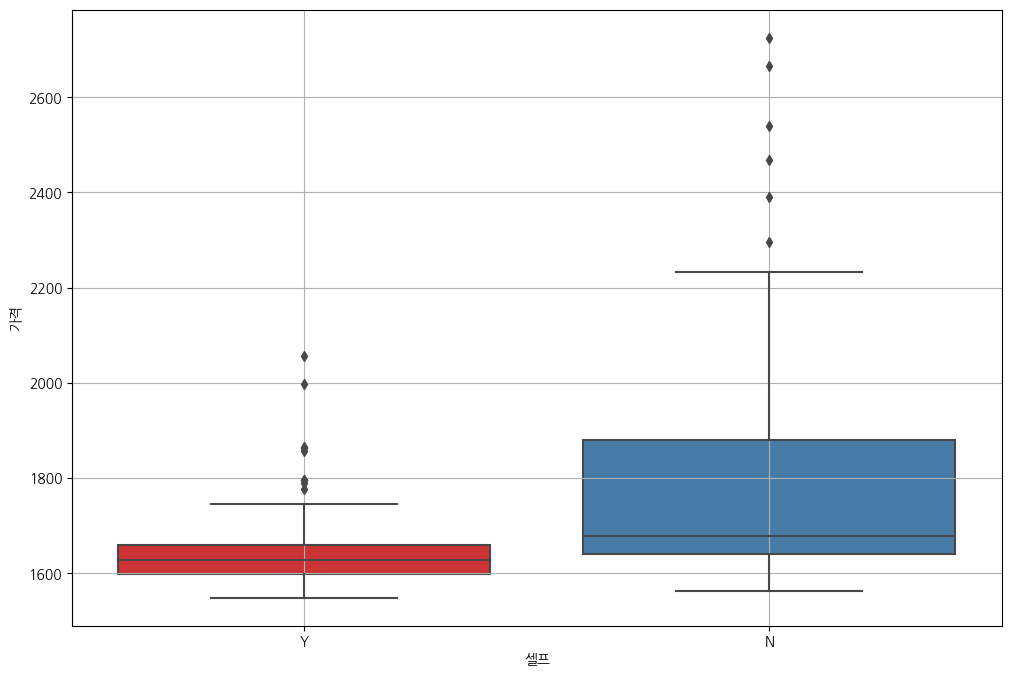

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x="셀프", y="가격", data= oil_data, palette="Set1")
plt.grid(True)
plt.show()

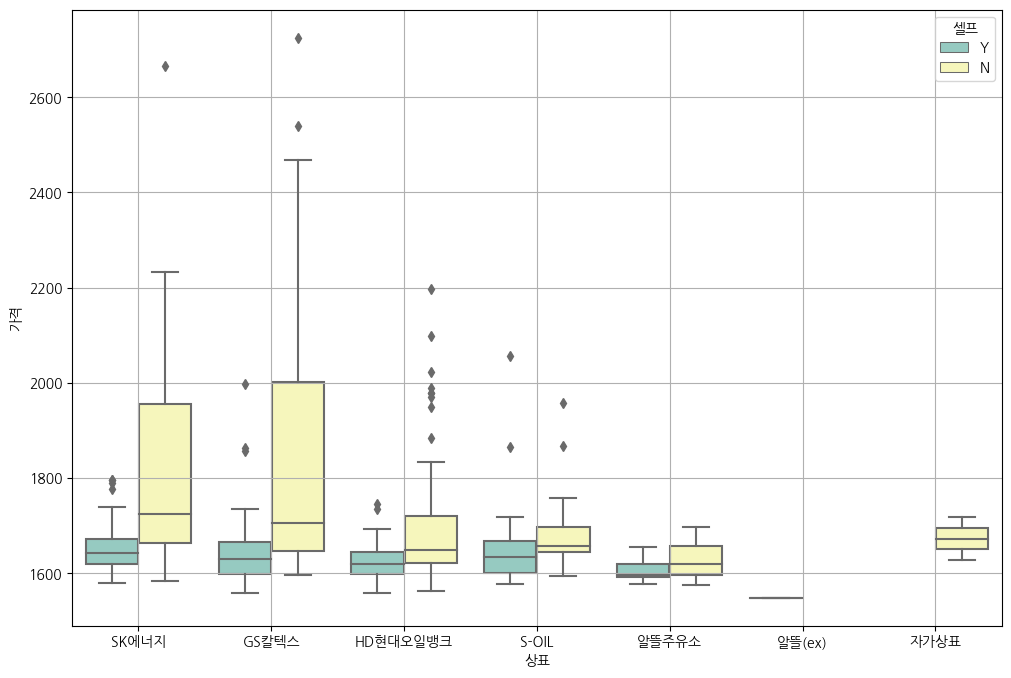

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=oil_data, palette="Set3")
plt.grid(True)
plt.show()

In [79]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [81]:
oil_data.sort_values("가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
391,서계주유소,서울 용산구 청파로 367 (청파동),2725.0,N,GS칼텍스,용산구
426,서남주유소,서울 중구 통일로 30,2665.0,N,SK에너지,중구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2540.0,N,GS칼텍스,강남구
425,필동주유소,서울 중구 퇴계로 196 (필동2가),2469.0,N,GS칼텍스,중구
376,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2390.0,N,GS칼텍스,영등포구
424,약수주유소,서울 중구 다산로 173,2297.0,N,GS칼텍스,중구
390,한석주유소,서울 용산구 이촌로 164,2233.0,N,SK에너지,용산구
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2197.0,N,HD현대오일뱅크,강남구
415,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2175.0,N,GS칼텍스,종로구
388,에너비스,서울 용산구 한남대로 82 (한남동),2167.0,N,SK에너지,용산구


In [82]:
oil_data.sort_values("가격").head(10)

,상호,주소,가격,셀프,상표,구
233,만남의광장주유소,서울 서초구 양재대로12길 73-71,1549.0,Y,알뜰(ex),서초구
165,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),1559.0,Y,GS칼텍스,도봉구
164,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1559.0,Y,HD현대오일뱅크,도봉구
150,월계주유소,서울 노원구 월계로 252 (월계동),1559.0,Y,GS칼텍스,노원구
168,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,1559.0,Y,GS칼텍스,도봉구
397,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1564.0,N,HD현대오일뱅크,은평구
281,지에스칼텍스(주) 종암주유소,서울 성북구 종암로 145 (종암동),1565.0,Y,GS칼텍스,성북구
63,지에스칼텍스㈜ 경인고속주유소,서울 강서구 국회대로 225 (화곡동),1567.0,Y,GS칼텍스,강서구
283,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1569.0,Y,GS칼텍스,성북구
282,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1569.0,Y,HD현대오일뱅크,성북구


In [83]:
import numpy as np

gu_data = pd.pivot_table(data= oil_data, index= "구", values="가격", aggfunc=np.mean)

gu_data.head(10)

,가격
구,
강남구,1869.411765
강동구,1699.571429
강북구,1605.666667
강서구,1645.454545
관악구,1662.285714
광진구,1623.076923
구로구,1672.421053
금천구,1656.818182
노원구,1624.928571


In [87]:
geo_path  = "../../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502,126.982], zoom_start=10.5, tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns = [gu_data.index, "가격"],
               key_on = "feature.id",
               fill_color="PuRd")
map